In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
%matplotlib inline

| Feature           | Type       | Description                                                                 |
|------------------|-----------|-----------------------------------------------------------------------------|
| Date              | Datetime  | The date of the observation (YYYY-MM-DD)                                     |
| Location          | Categorical | The weather station/location name                                           |
| MinTemp           | Numeric   | Minimum temperature recorded on the day (°C)                                |
| MaxTemp           | Numeric   | Maximum temperature recorded on the day (°C)                                |
| Rainfall          | Numeric   | Amount of rainfall recorded for the day (mm)                                 |
| Evaporation       | Numeric   | Amount of water evaporated (mm)                                             |
| Sunshine          | Numeric   | Number of hours of sunshine recorded (hours)                                 |
| WindGustDir       | Categorical | Direction of strongest wind gust recorded                                     |
| WindGustSpeed     | Numeric   | Speed of the strongest wind gust (km/h)                                      |
| WindDir9am        | Categorical | Wind direction at 9 AM                                                       |
| WindDir3pm        | Categorical | Wind direction at 3 PM                                                       |
| WindSpeed9am      | Numeric   | Wind speed at 9 AM (km/h)                                                   |
| WindSpeed3pm      | Numeric   | Wind speed at 3 PM (km/h)                                                   |
| Humidity9am       | Numeric   | Humidity recorded at 9 AM (%)                                               |
| Humidity3pm       | Numeric   | Humidity recorded at 3 PM (%)                                               |
| Pressure9am       | Numeric   | Atmospheric pressure at 9 AM (hPa)                                          |
| Pressure3pm       | Numeric   | Atmospheric pressure at 3 PM (hPa)                                          |
| Cloud9am          | Numeric   | Cloud coverage at 9 AM (oktas)                                              |
| Cloud3pm          | Numeric   | Cloud coverage at 3 PM (oktas)                                              |
| Temp9am           | Numeric   | Temperature recorded at 9 AM (°C)                                           |
| Temp3pm           | Numeric   | Temperature recorded at 3 PM (°C)                                           |
| RainToday         | Categorical | Whether it rained today (Yes/No)                                            |
| RainTomorrow      | Categorical | Whether it rained the next day (Yes/No) — **target variable**               |


In [2]:
df=pd.read_csv("/content/weatherAUS.csv")

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [4]:
df.shape

(145460, 23)

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [8]:
df.shape

(56420, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

In [10]:
df.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean      13.464770     24.219206      2.130397      5.503135      7.735626   
std        6.416689      6.970676      7.014822      3.696282      3.758153   
min       -6.700000      4.100000      0.000000      0.000000      0.000000   
25%        8.600000     18.700000      0.000000      2.800000      5.000000   
50%       13.200000     23.900000      0.000000      5.000000      8.600000   
75%       18.400000     29.700000      0.600000      7.400000     10.700000   
max       31.400000     48.100000    206.200000     81.200000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean       40.877366     15.667228     19.786778     65.874123     49.601985   
std        13.335232      8.317005      8.510180     18.513289     20.197040   
min         9.000000      2.000000      2.000000      0.000000      0.000000   
25%        31.000000      9.000000     13.000000     55.000000     35.000000   
50%        39.000000     15.000000     19.000000     67.000000     50.000000   
75%        48.000000     20.000000     26.000000     79.000000     63.000000   
max       124.000000     67.000000     76.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean    1017.239505   1014.795580      4.241705      4.326515     18.204961   
std        6.909357      6.870892      2.797162      2.647251      6.567991   
min      980.500000    977.100000      0.000000      0.000000     -0.700000   
25%     1012.700000   1010.100000      1.000000      2.000000     13.100000   
50%     1017.200000   1014.700000      5.000000      5.000000     17.800000   
75%     1021.800000   1019.400000      7.000000      7.000000     23.300000   
max     1040.400000   1038.900000      8.000000      9.000000     39.400000   

            Temp3pm  
count  56420.000000  
mean      22.710333  
std        6.836543  
min        3.700000  
25%       17.400000  
50%       22.400000  
75%       27.900000  
max       46.100000

In [11]:
df = df.reset_index(drop=True)

In [12]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3   
1  2009-01-02    Cobar     18.4     28.9       0.0         14.8      13.0   
2  2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
3  2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   
4  2009-01-06    Cobar     24.2     41.0       0.0         11.2       8.4   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         SSW           48.0        ENE         SW           6.0   
1           S           37.0        SSE        SSE          19.0   
2         NNE           46.0        NNE        NNW          30.0   
3         WNW           31.0        WNW        WSW           6.0   
4         WNW           35.0         NW        WNW          17.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         20.0         13.0       1006.3       1004.4       2.0   
1          19.0         30.0          8.0       1012.9       1012.1       1.0   
2          15.0         42.0         22.0       1012.3       1009.2       1.0   
3           6.0         37.0         22.0       1012.7       1009.1       1.0   
4          13.0         19.0         15.0       1010.7       1007.4       1.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       5.0     26.6     33.4        No           No  
1       1.0     20.3     27.0        No           No  
2       6.0     28.7     34.9        No           No  
3       5.0     29.1     35.6        No           No  
4       6.0     33.6     37.6        No           No

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
numerical_cols = df.select_dtypes(include=['float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

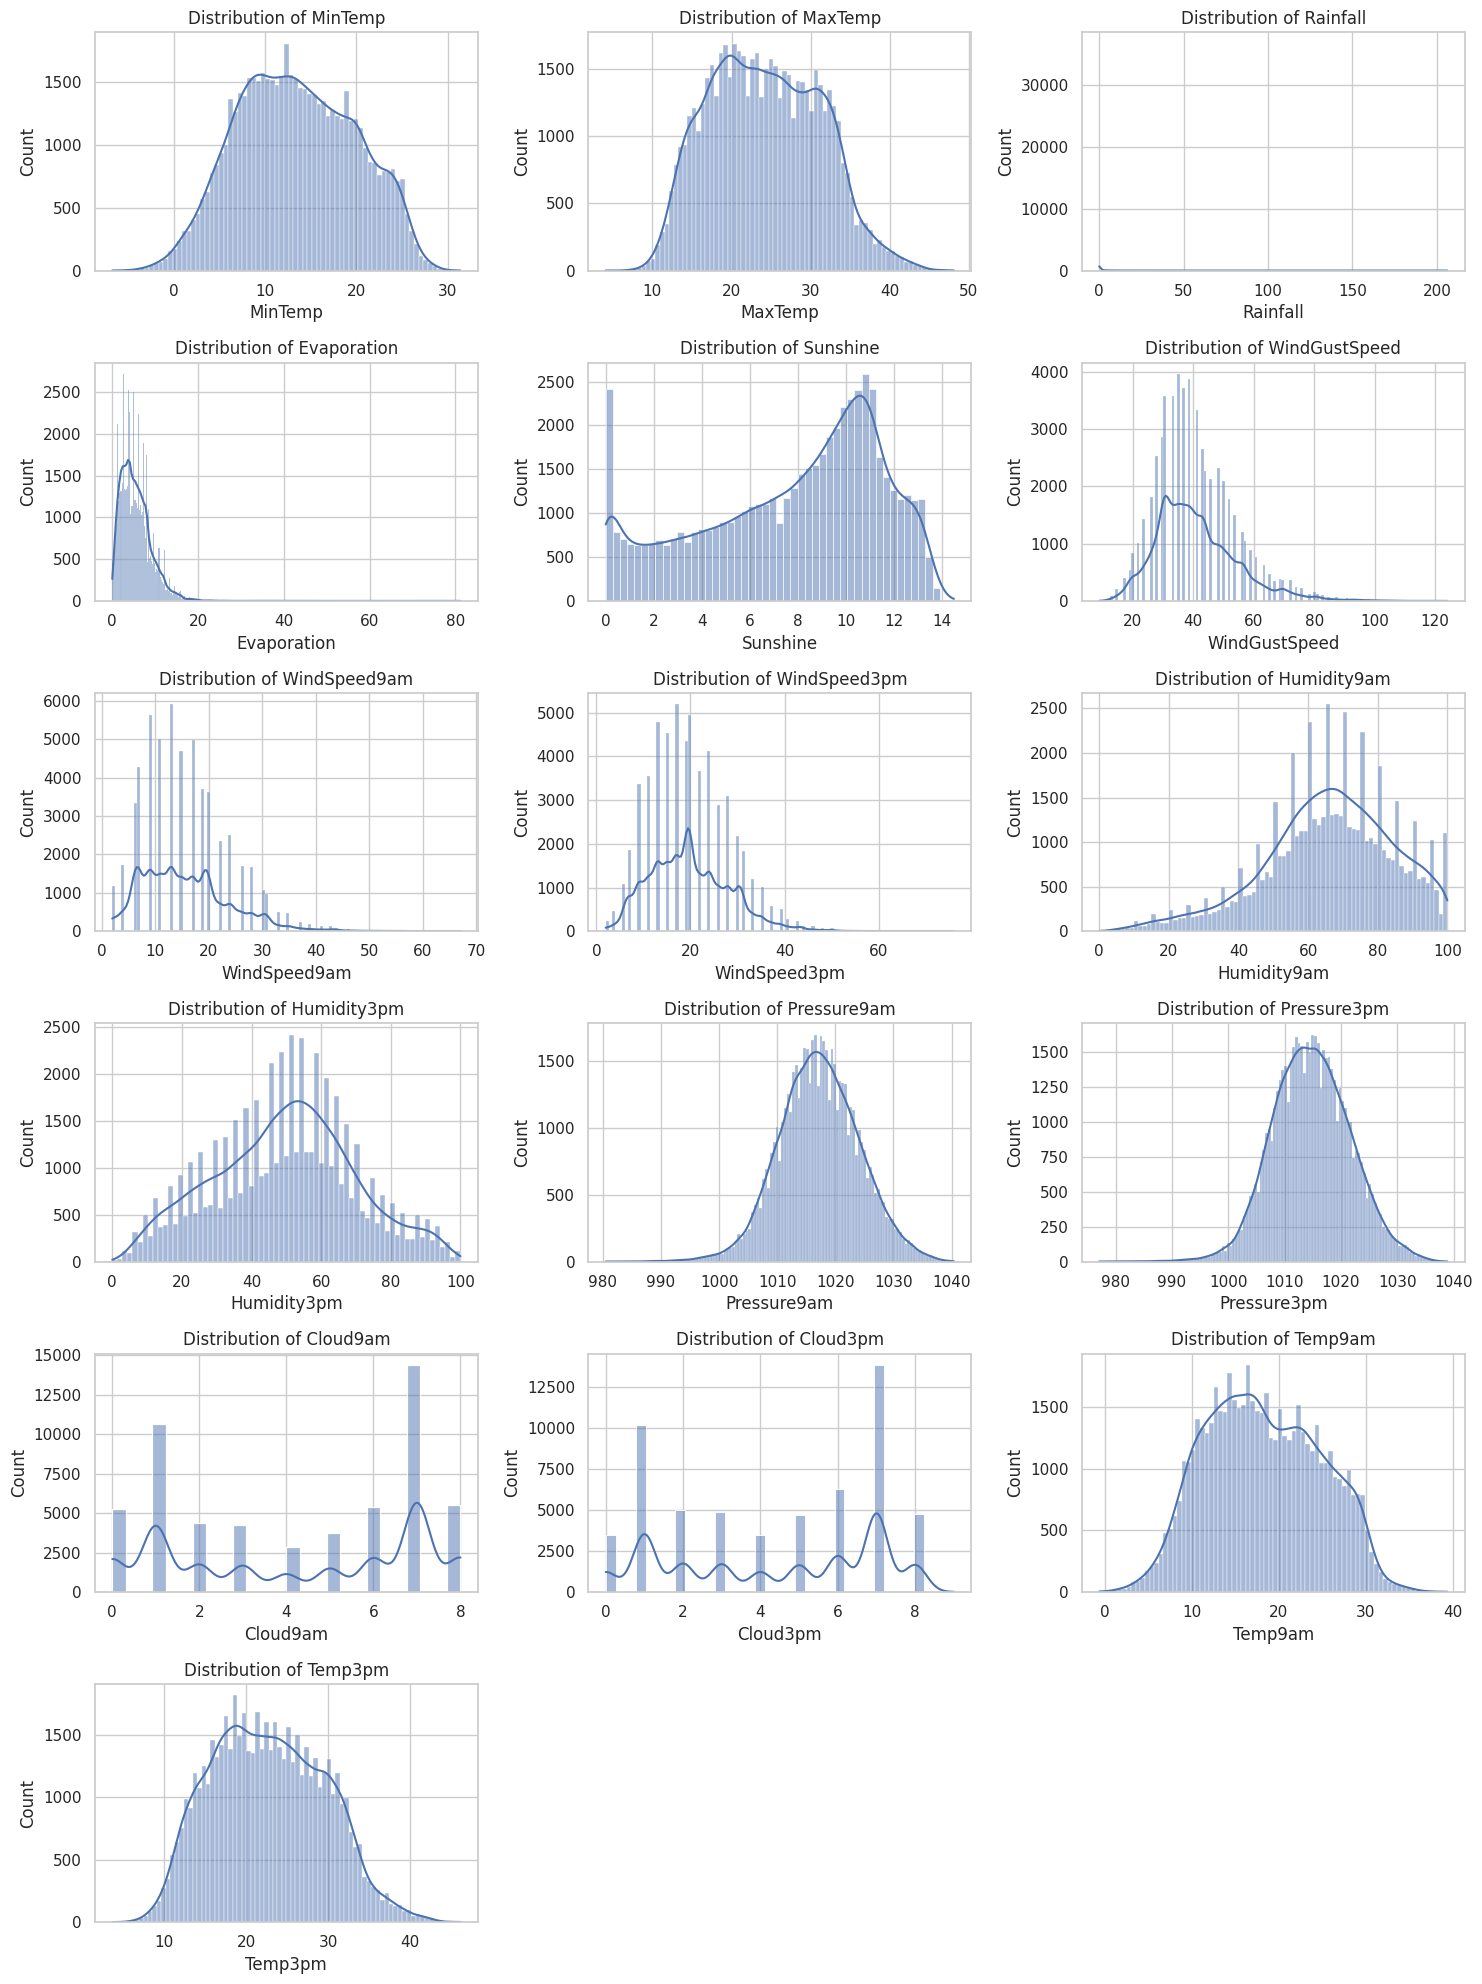

In [14]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)

# 1. Histograms for numerical variables
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                  'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                  'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
                  'Cloud3pm', 'Temp9am', 'Temp3pm']
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

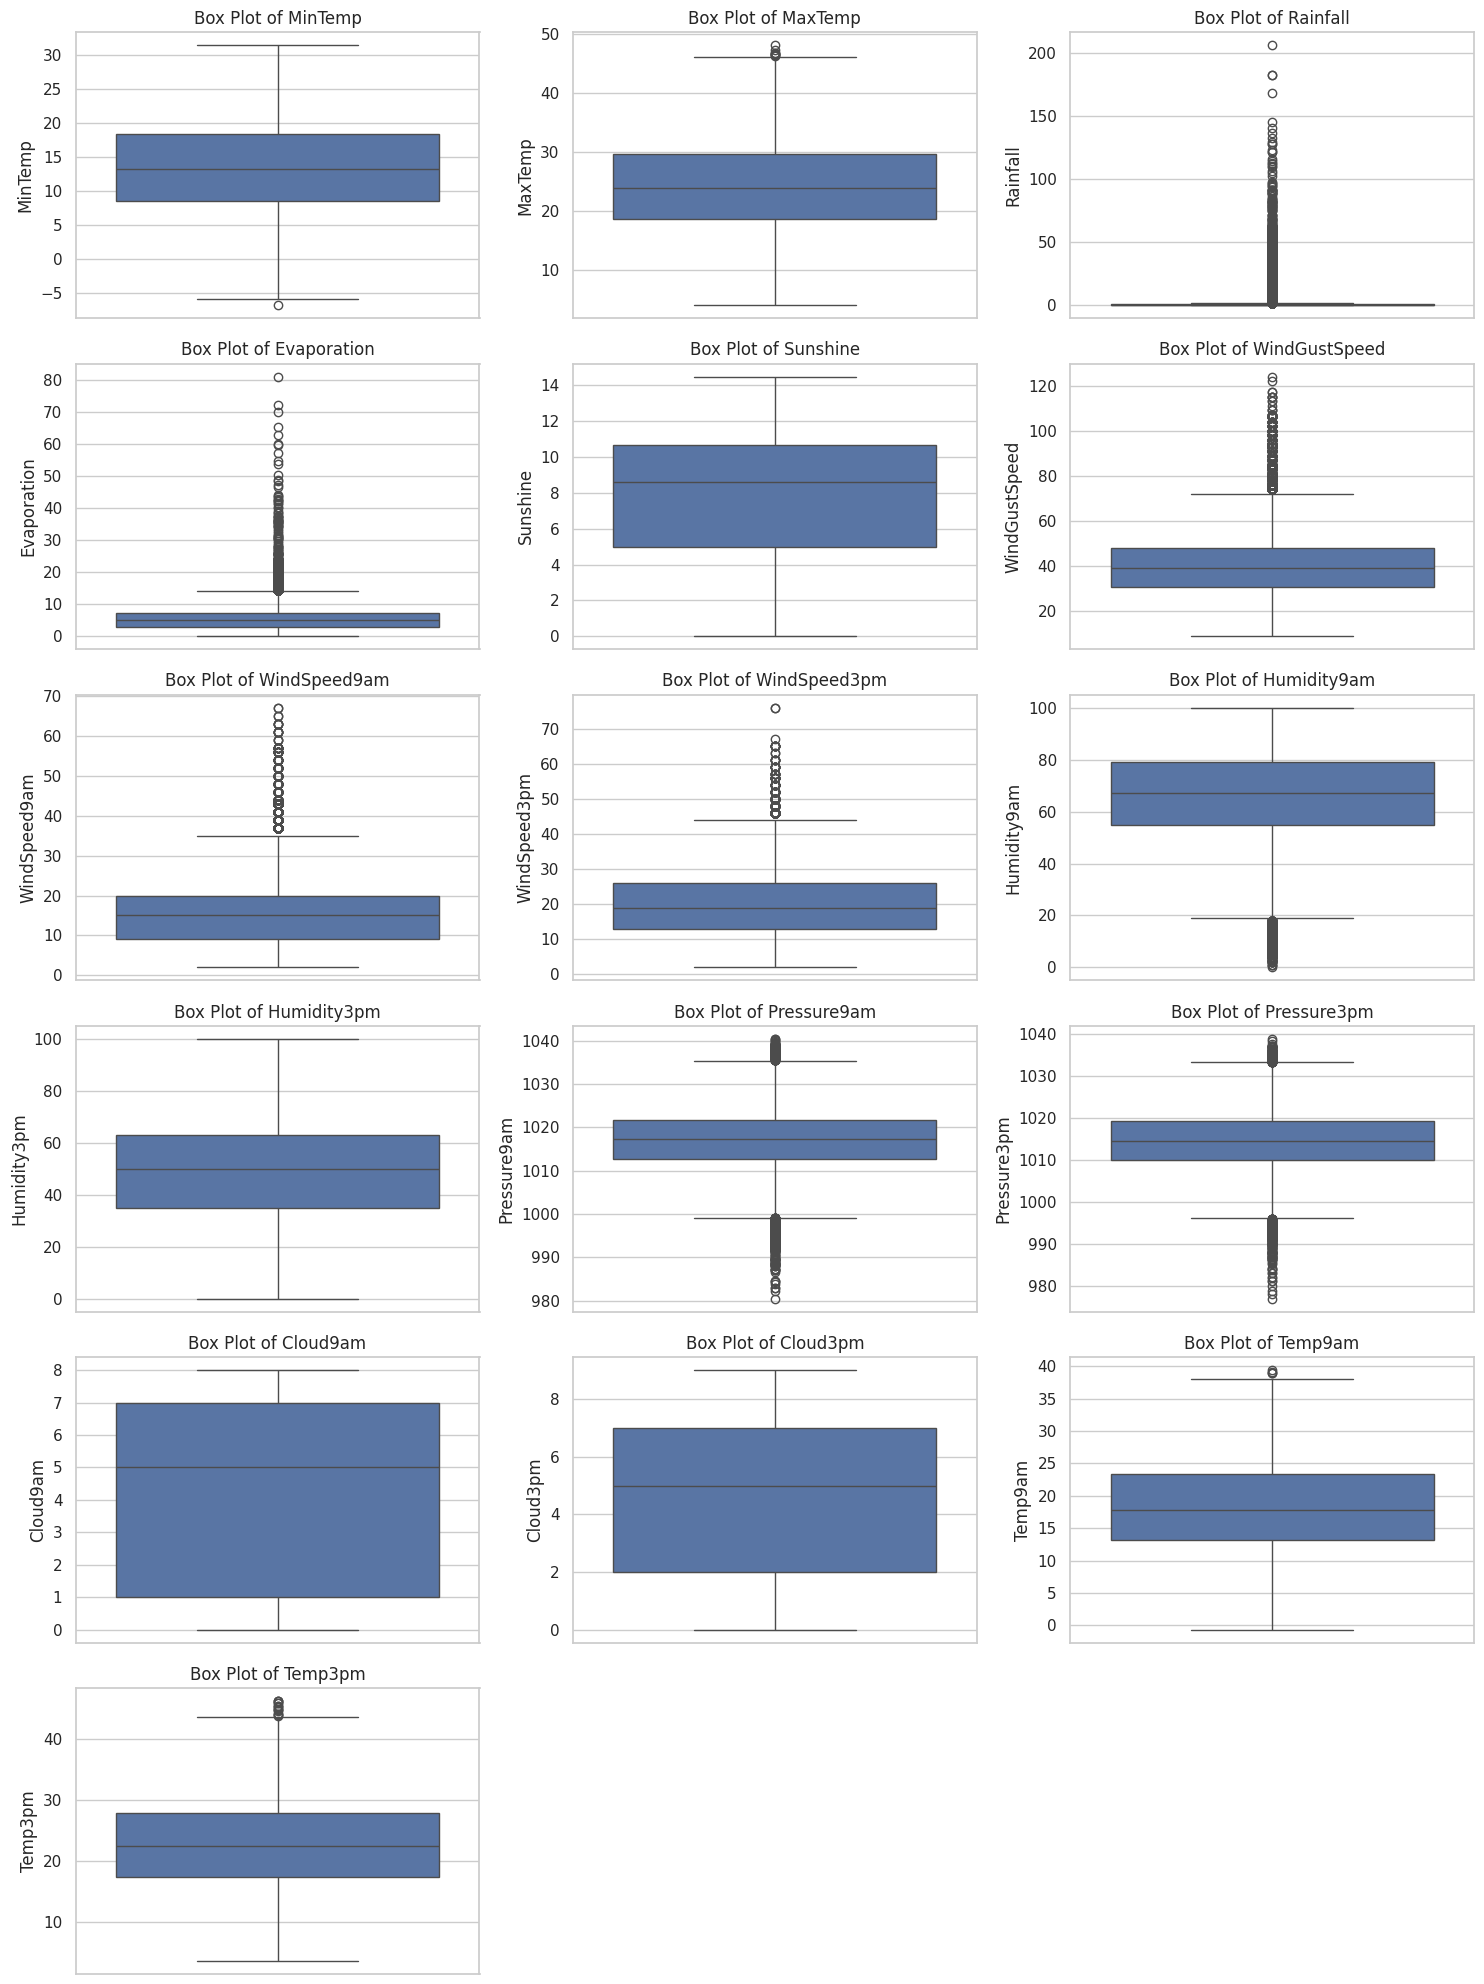

In [15]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

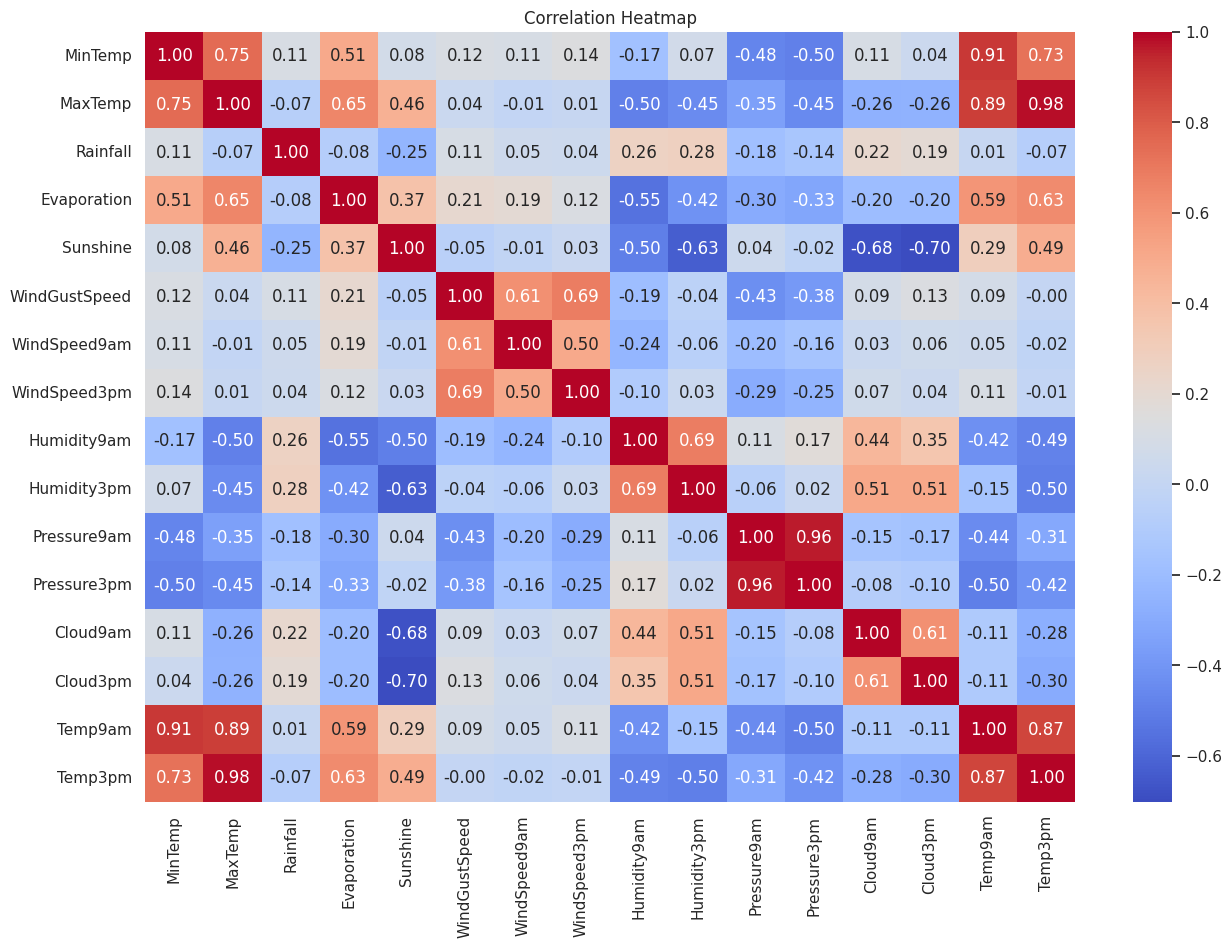

In [16]:
plt.figure(figsize=(15, 10))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

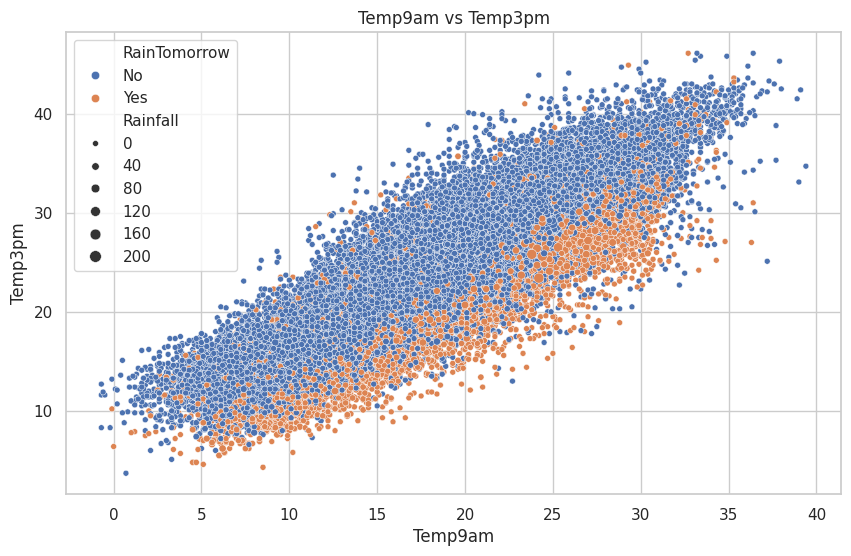

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp9am', y='Temp3pm', hue='RainTomorrow', size='Rainfall', data=df)
plt.title('Temp9am vs Temp3pm')
plt.show()


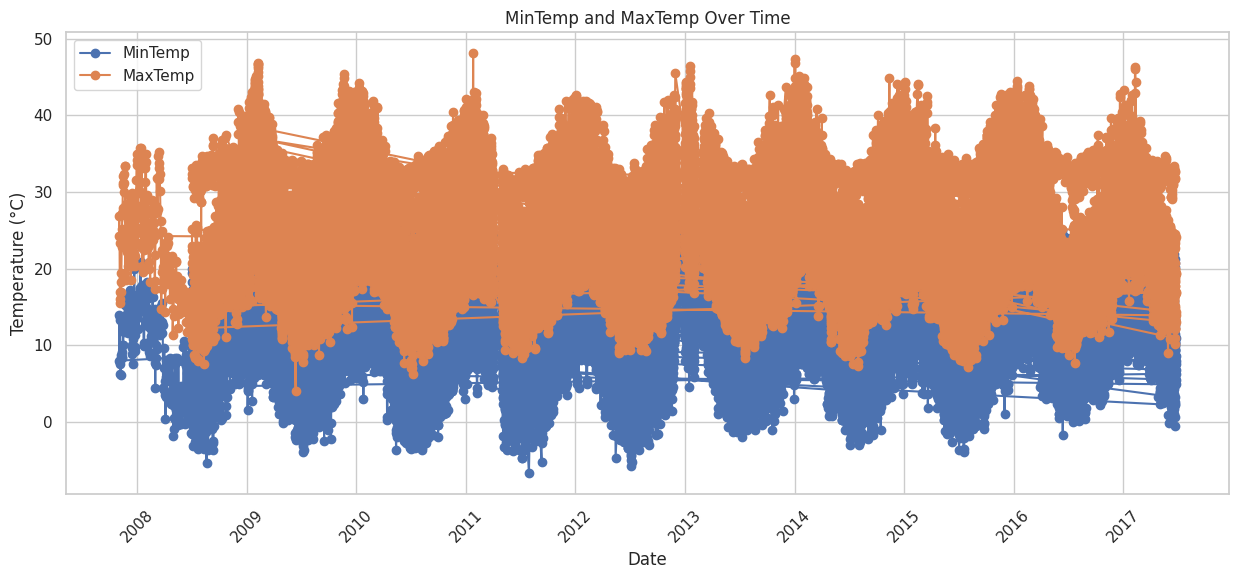

In [18]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['MinTemp'], label='MinTemp', marker='o')
plt.plot(df['Date'], df['MaxTemp'], label='MaxTemp', marker='o')
plt.title('MinTemp and MaxTemp Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

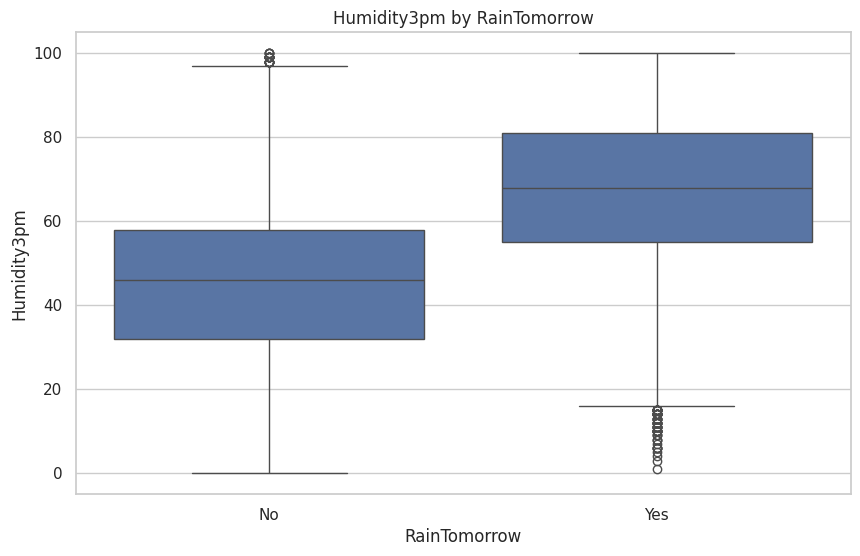

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df)
plt.title('Humidity3pm by RainTomorrow')
plt.show()

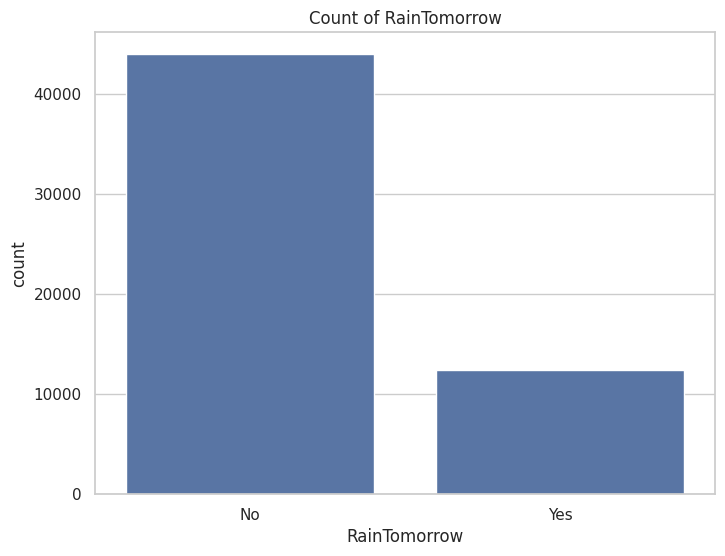

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Count of RainTomorrow')
plt.show()


In [21]:
wind_dirs = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
             'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
wind_angles = np.linspace(0, 360, len(wind_dirs), endpoint=False)
wind_dict = dict(zip(wind_dirs, wind_angles))

# Map wind directions to angles
df['WindDir9am_Angle'] = df['WindDir9am'].map(wind_dict)
df['WindDir3pm_Angle'] = df['WindDir3pm'].map(wind_dict)

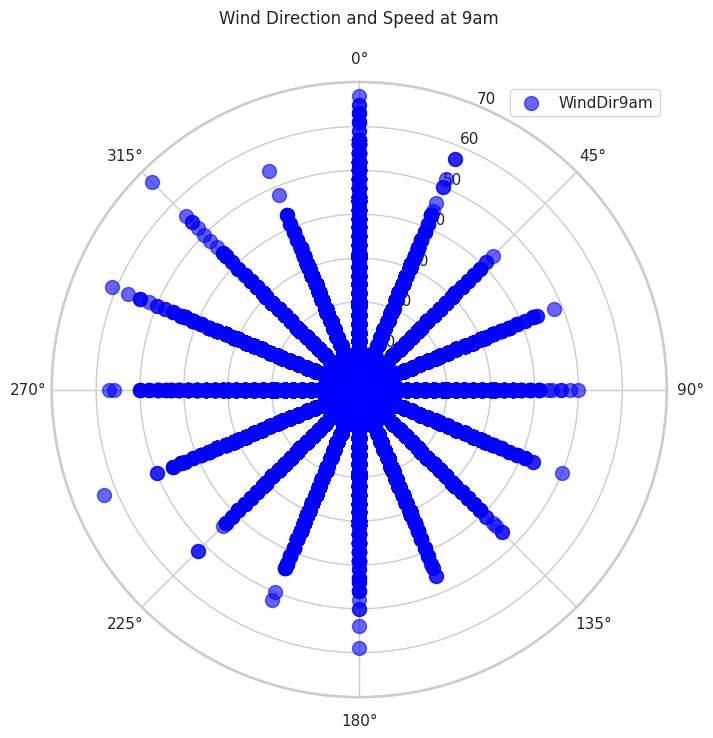

In [22]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')
ax.scatter(df['WindDir9am_Angle'] * np.pi / 180, df['WindSpeed9am'], c='blue', s=100, alpha=0.6, label='WindDir9am')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Wind Direction and Speed at 9am', pad=20)
plt.legend()
plt.show()

In [23]:
import plotly.express as px
fig = px.scatter(df, x='Temp9am', y='Temp3pm', color='RainTomorrow', size='Rainfall',
                 hover_data=['Date', 'MinTemp', 'MaxTemp'], title='Interactive Temp9am vs Temp3pm')
fig.show()

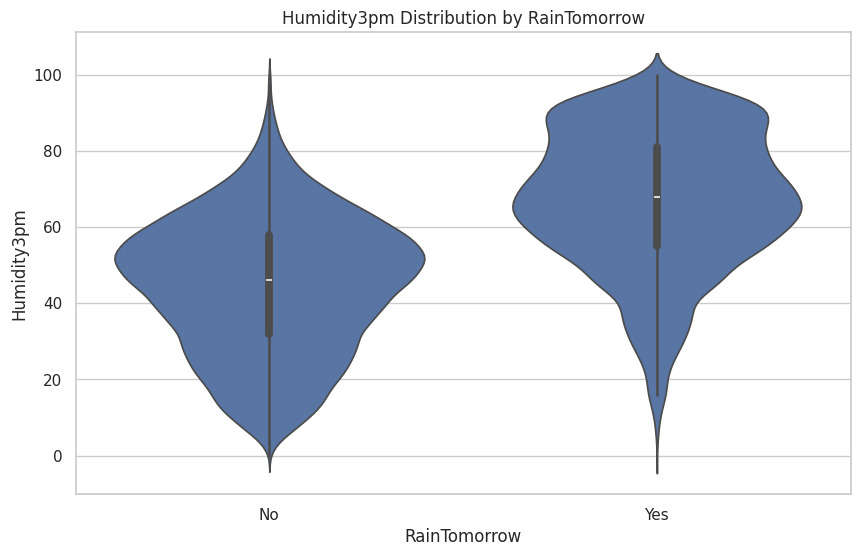

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='RainTomorrow', y='Humidity3pm', data=df)
plt.title('Humidity3pm Distribution by RainTomorrow')
plt.show()

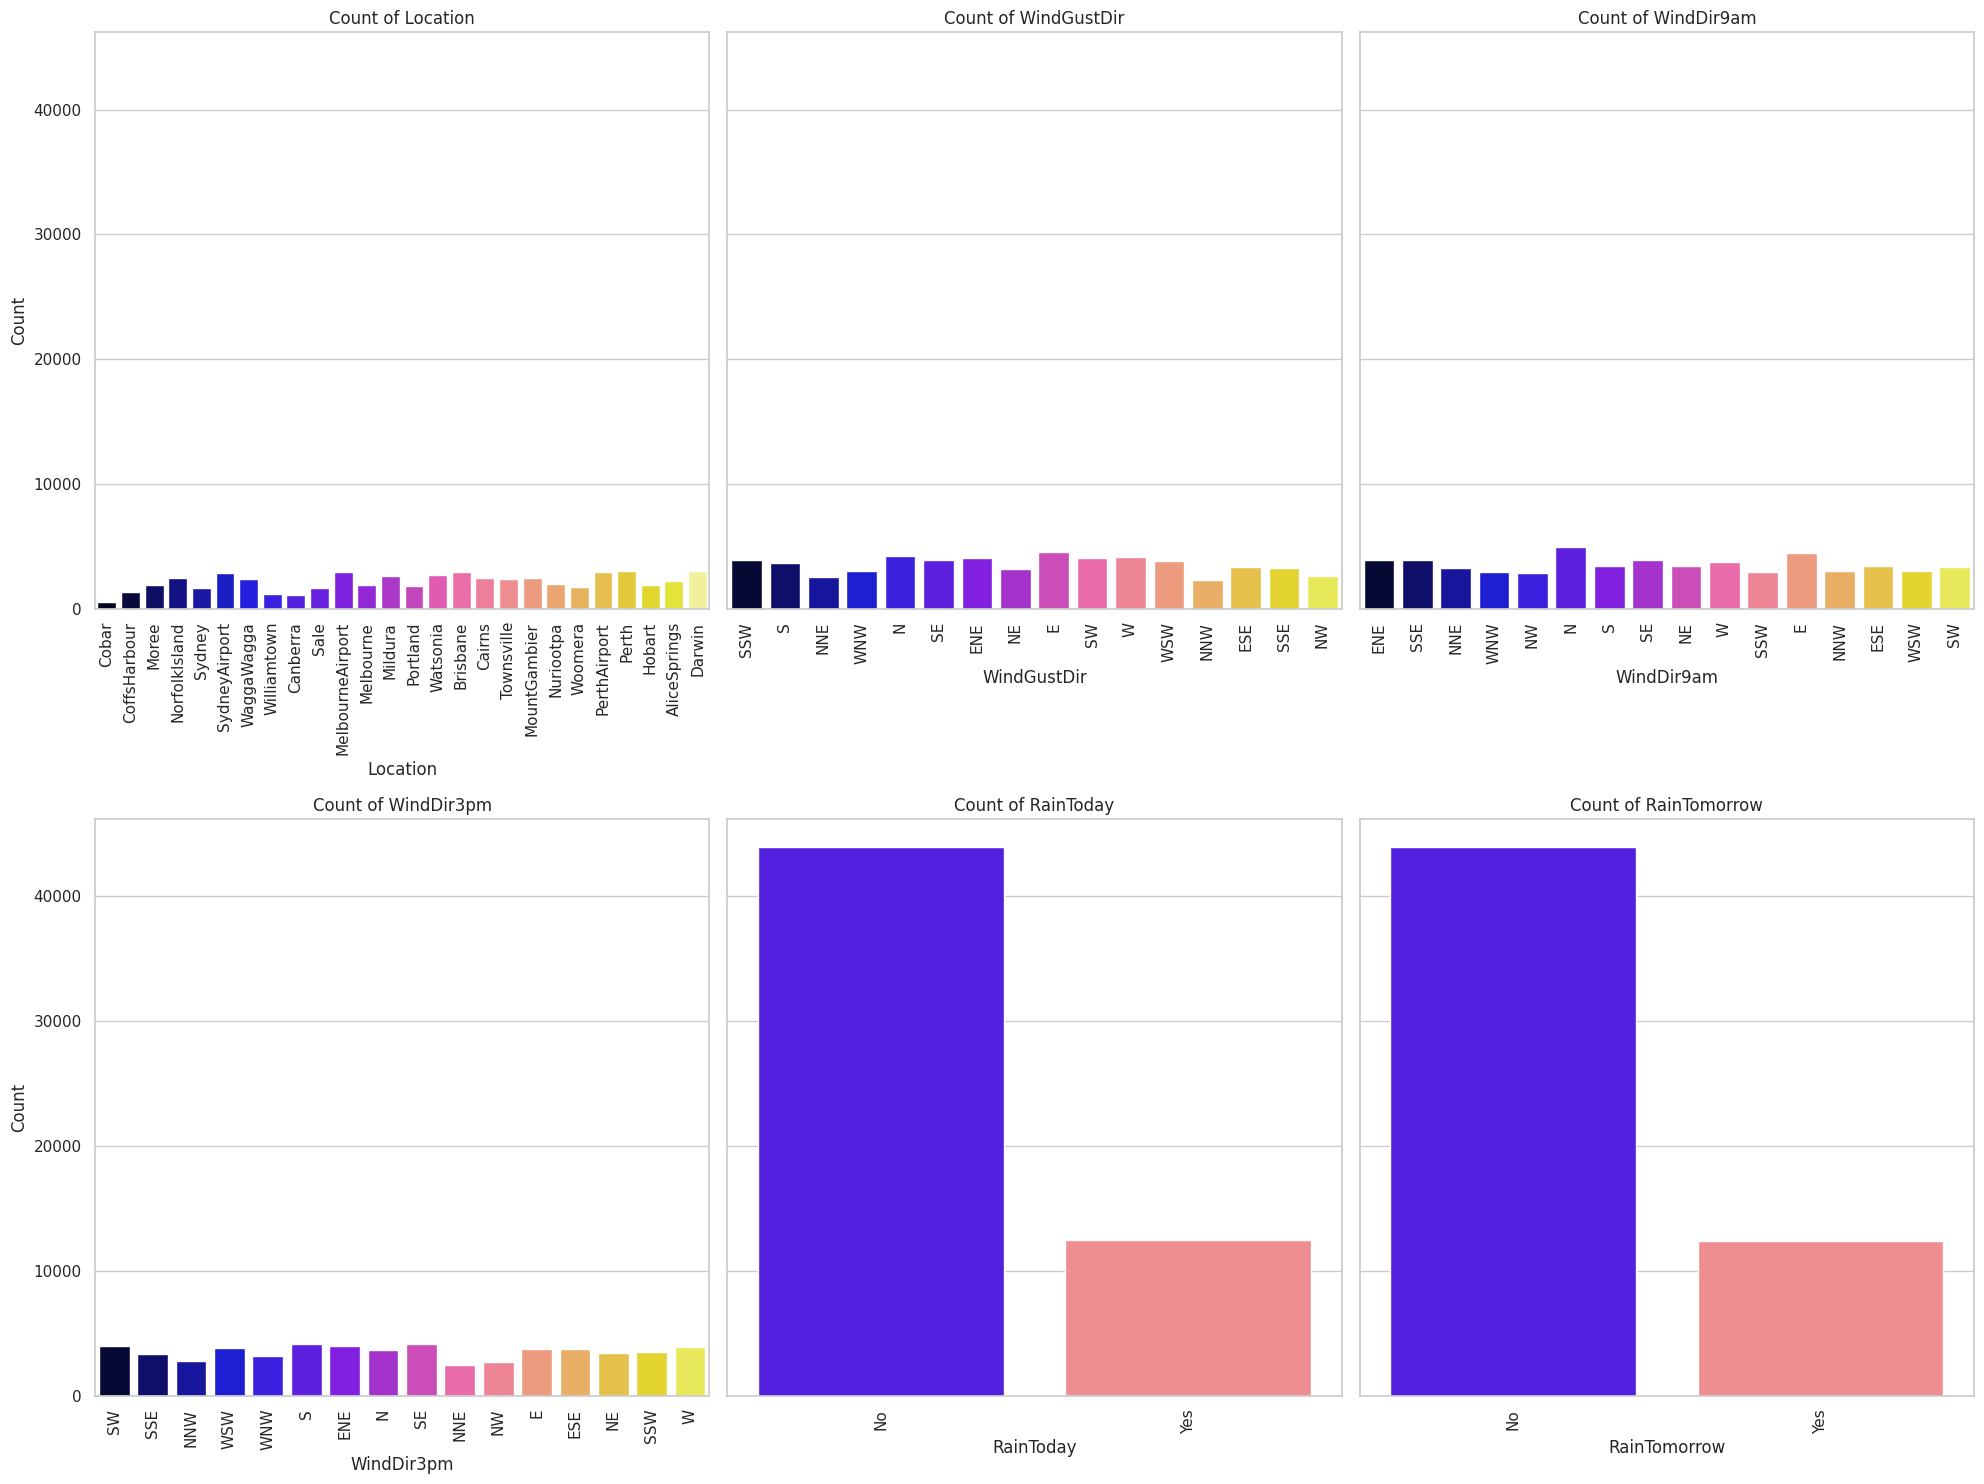

In [25]:
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
sub_df = df[categorical_cols].copy()

# Handle missing values in sub_df (fill with mode)
sub_df = sub_df.fillna(sub_df.mode().iloc[0])

# Set up the plotting style
sns.set(style="whitegrid")

# Create a subplot grid (2 rows, 3 columns for 6 categorical columns)
fig, axes = plt.subplots(2, 3, figsize=(20, 15), sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Create bar plots for each categorical column in sub_df
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=sub_df, palette='gnuplot2', ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [26]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3   
1 2009-01-02    Cobar     18.4     28.9       0.0         14.8      13.0   
2 2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
3 2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   
4 2009-01-06    Cobar     24.2     41.0       0.0         11.2       8.4   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         SSW           48.0        ENE         SW           6.0   
1           S           37.0        SSE        SSE          19.0   
2         NNE           46.0        NNE        NNW          30.0   
3         WNW           31.0        WNW        WSW           6.0   
4         WNW           35.0         NW        WNW          17.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         20.0         13.0       1006.3       1004.4       2.0   
1          19.0         30.0          8.0       1012.9       1012.1       1.0   
2          15.0         42.0         22.0       1012.3       1009.2       1.0   
3           6.0         37.0         22.0       1012.7       1009.1       1.0   
4          13.0         19.0         15.0       1010.7       1007.4       1.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  WindDir9am_Angle  \
0       5.0     26.6     33.4        No           No              67.5   
1       1.0     20.3     27.0        No           No             157.5   
2       6.0     28.7     34.9        No           No              22.5   
3       5.0     29.1     35.6        No           No             292.5   
4       6.0     33.6     37.6        No           No             315.0   

   WindDir3pm_Angle  
0             225.0  
1             157.5  
2             337.5  
3             247.5  
4             292.5

In [27]:

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)

In [28]:
df.drop(columns=['Date'],inplace=True)

In [29]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0    Cobar     17.9     35.2       0.0         12.0      12.3         SSW   
1    Cobar     18.4     28.9       0.0         14.8      13.0           S   
2    Cobar     19.4     37.6       0.0         10.8      10.6         NNE   
3    Cobar     21.9     38.4       0.0         11.4      12.2         WNW   
4    Cobar     24.2     41.0       0.0         11.2       8.4         WNW   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           48.0        ENE         SW           6.0          20.0   
1           37.0        SSE        SSE          19.0          19.0   
2           46.0        NNE        NNW          30.0          15.0   
3           31.0        WNW        WSW           6.0           6.0   
4           35.0         NW        WNW          17.0          13.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         20.0         13.0       1006.3       1004.4       2.0       5.0   
1         30.0          8.0       1012.9       1012.1       1.0       1.0   
2         42.0         22.0       1012.3       1009.2       1.0       6.0   
3         37.0         22.0       1012.7       1009.1       1.0       5.0   
4         19.0         15.0       1010.7       1007.4       1.0       6.0   

   Temp9am  Temp3pm RainToday RainTomorrow  WindDir9am_Angle  \
0     26.6     33.4        No           No              67.5   
1     20.3     27.0        No           No             157.5   
2     28.7     34.9        No           No              22.5   
3     29.1     35.6        No           No             292.5   
4     33.6     37.6        No           No             315.0   

   WindDir3pm_Angle  Year  Month  Day  DayOfWeek  WeekOfYear  IsWeekend  
0             225.0  2009      1    1          3           1          0  
1             157.5  2009      1    2          4           1          0  
2             337.5  2009      1    4          6           1          1  
3             247.5  2009      1    5          0           2          0  
4             292.5  2009      1    6          1           2          0

In [30]:
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Select categorical/string columns
cat_cols = df.select_dtypes(include='object').columns

# Initialize dictionary to store label mappings
label_mappings = {}

# Encode categorical columns and store mappings
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display mappings in a table
for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    print(tabulate(mapping.items(), headers=['Category', 'Encoded'], tablefmt='grid'))
    print("\n")


Column: Location
+------------------+-----------+
| Category         |   Encoded |
+==================+===========+
| AliceSprings     |         0 |
+------------------+-----------+
| Brisbane         |         1 |
+------------------+-----------+
| Cairns           |         2 |
+------------------+-----------+
| Canberra         |         3 |
+------------------+-----------+
| Cobar            |         4 |
+------------------+-----------+
| CoffsHarbour     |         5 |
+------------------+-----------+
| Darwin           |         6 |
+------------------+-----------+
| Hobart           |         7 |
+------------------+-----------+
| Melbourne        |         8 |
+------------------+-----------+
| MelbourneAirport |         9 |
+------------------+-----------+
| Mildura          |        10 |
+------------------+-----------+
| Moree            |        11 |
+------------------+-----------+
| MountGambier     |        12 |
+------------------+-----------+
| NorfolkIsland    |      

In [31]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         4     17.9     35.2       0.0         12.0      12.3           11   
1         4     18.4     28.9       0.0         14.8      13.0            8   
2         4     19.4     37.6       0.0         10.8      10.6            5   
3         4     21.9     38.4       0.0         11.4      12.2           14   
4         4     24.2     41.0       0.0         11.2       8.4           14   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           48.0           1          12           6.0          20.0   
1           37.0          10          10          19.0          19.0   
2           46.0           5           6          30.0          15.0   
3           31.0          14          15           6.0           6.0   
4           35.0           7          14          17.0          13.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         20.0         13.0       1006.3       1004.4       2.0       5.0   
1         30.0          8.0       1012.9       1012.1       1.0       1.0   
2         42.0         22.0       1012.3       1009.2       1.0       6.0   
3         37.0         22.0       1012.7       1009.1       1.0       5.0   
4         19.0         15.0       1010.7       1007.4       1.0       6.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  WindDir9am_Angle  \
0     26.6     33.4          0             0              67.5   
1     20.3     27.0          0             0             157.5   
2     28.7     34.9          0             0              22.5   
3     29.1     35.6          0             0             292.5   
4     33.6     37.6          0             0             315.0   

   WindDir3pm_Angle  Year  Month  Day  DayOfWeek  WeekOfYear  IsWeekend  
0             225.0  2009      1    1          3           1          0  
1             157.5  2009      1    2          4           1          0  
2             337.5  2009      1    4          6           1          1  
3             247.5  2009      1    5          0           2          0  
4             292.5  2009      1    6          1           2          0

In [32]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(5)

In [34]:
top_features_list = top_features.index.tolist()
selected_columns = top_features_list + ['RainTomorrow']
df = df[selected_columns]

In [35]:
df.head()

Humidity3pm  Sunshine  Pressure3pm  Cloud3pm  Pressure9am  RainTomorrow
0         13.0      12.3       1004.4       5.0       1006.3             0
1          8.0      13.0       1012.1       1.0       1012.9             0
2         22.0      10.6       1009.2       6.0       1012.3             0
3         22.0      12.2       1009.1       5.0       1012.7             0
4         15.0       8.4       1007.4       6.0       1010.7             0

In [36]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
train_df = pd.concat([X_train, y_train], axis=1)
train_df.head()

Humidity3pm  Sunshine  Pressure3pm  Cloud3pm  Pressure9am  RainTomorrow
54696         25.0       9.4       1010.5       1.0       1015.0             0
17525         19.0      13.0       1020.9       1.0       1024.0             0
25240         63.0       7.6       1001.4       6.0       1000.7             1
42547          5.0       9.2       1005.7       1.0       1012.0             0
32832         65.0       3.5       1011.1       7.0       1013.9             0

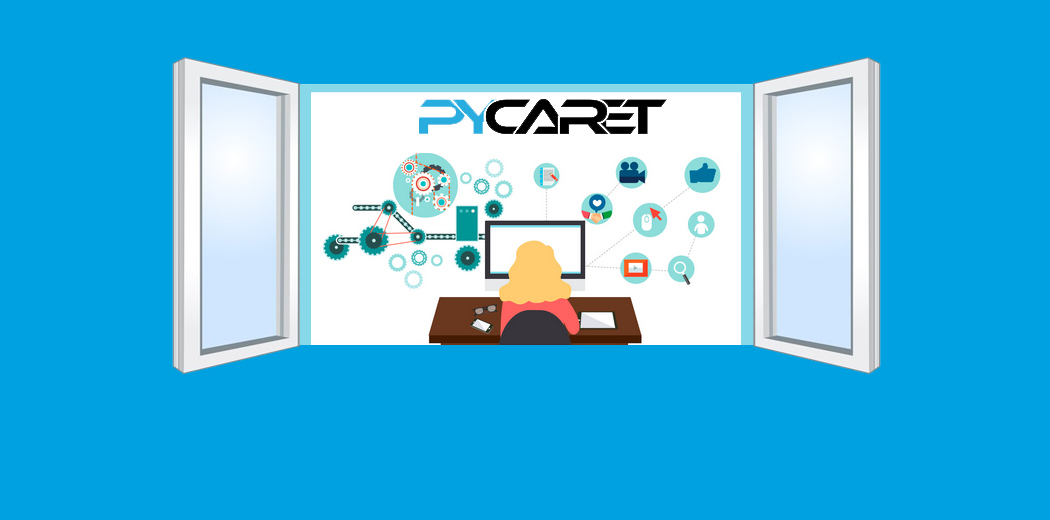

In [38]:
!pip install pycaret

In [39]:
from pycaret.classification import *

s = setup(data=train_df,target='RainTomorrow',session_id=123,train_size=0.8,fold=10,normalize=True,transformation=True)

best_model = compare_models(sort="Accuracy")


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

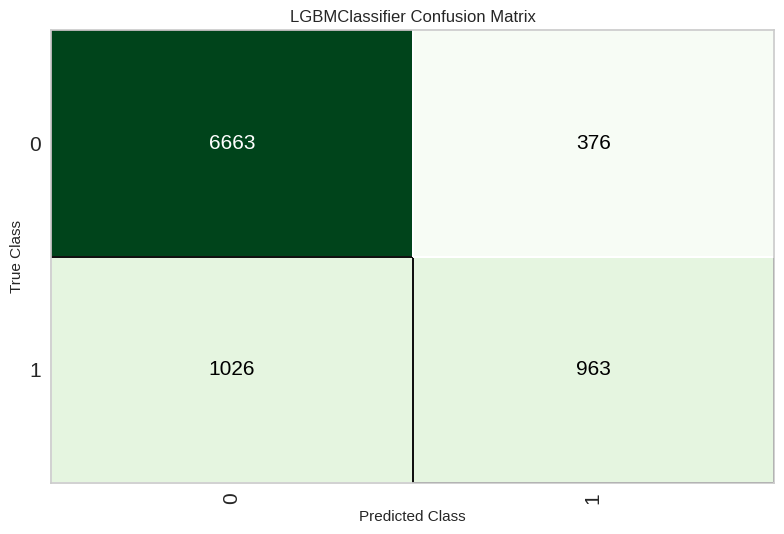

In [40]:
plot_model(best_model, plot = 'confusion_matrix')

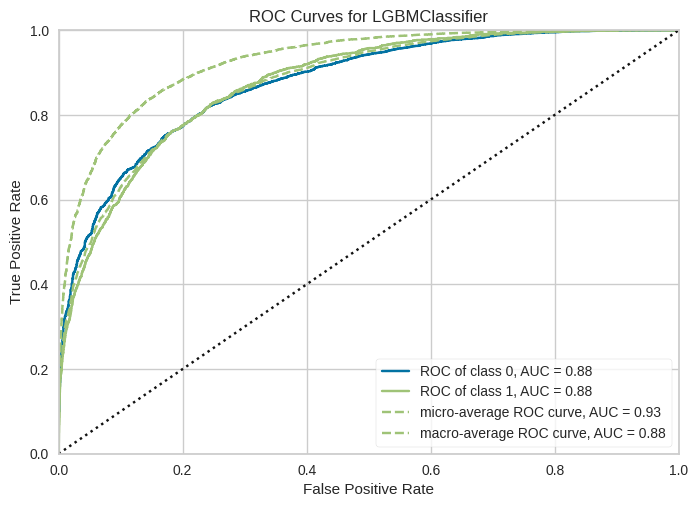

In [41]:
# plot AUC
plot_model(best_model, plot = 'auc')

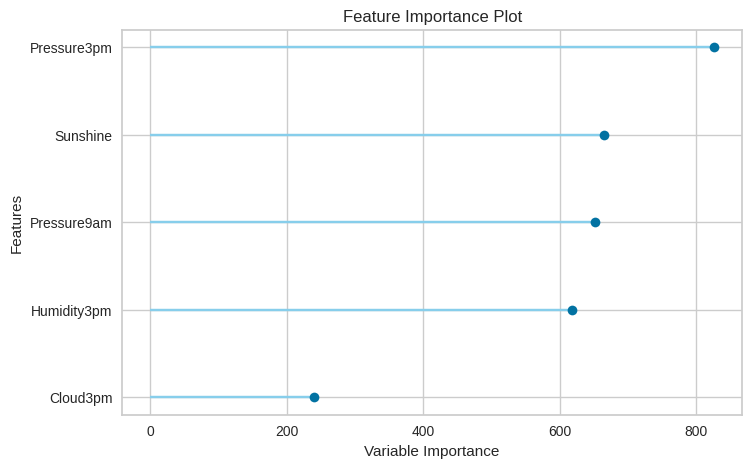

In [42]:
# plot feature importance
plot_model(best_model, plot = 'feature')

In [43]:
# predict on test set
holdout_pred = predict_model(best_model)

In [44]:
holdout_pred.head()

Humidity3pm  Sunshine  Pressure3pm  Cloud3pm  Pressure9am  \
14970         58.0       1.7  1012.500000       7.0  1013.599976   
48538         45.0       9.8  1020.900024       1.0  1025.099976   
13739         59.0       6.8  1023.799988       5.0  1025.500000   
14577         56.0       3.8  1008.400024       7.0  1011.799988   
25445         97.0       0.8   997.400024       8.0  1001.900024   

       RainTomorrow  prediction_label  prediction_score  
14970             0                 0            0.6002  
48538             0                 0            0.9676  
13739             1                 0            0.9061  
14577             1                 0            0.6872  
25445             1                 1            0.9804

In [45]:
predictions = predict_model(best_model, data = X_test)
predictions.head()

Humidity3pm  Sunshine  Pressure3pm  Cloud3pm  Pressure9am  \
15423         39.0      13.2  1014.000000       3.0  1018.400024   
53403          8.0      10.8  1013.700012       1.0  1017.599976   
6095          62.0      10.1  1009.599976       3.0  1009.099976   
6667          42.0       2.5  1008.500000       7.0  1010.200012   
48236         48.0      11.1  1021.700012       2.0  1023.500000   

       prediction_label  prediction_score  
15423                 0            0.9969  
53403                 0            0.9978  
6095                  0            0.7952  
6667                  0            0.7625  
48236                 0            0.9804

In [46]:
save_model(best_model, 'rain_prediction_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Humidity3pm', 'Sunshine',
                                              'Pressure3pm', 'Cloud3pm',
                                              'Pressure9am'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
            

In [47]:
! pip freeze

absl-py==1.4.0
accelerate==1.10.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.15
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.10.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.7.2
arviz==0.22.0
astropy==7.1.0
astropy-iers-data==0.2025.8.11.0.41.9
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.14.0
bigquery-magics==0.10.2
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.6.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
category_encoders==2.7.0
certifi==2025.8.3
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.3
chex==0.1.90
choreographer==1.0.9
clarabel==0.11.1
c